In [2]:
import numpy as np
import matplotlib.pyplot as plt
from math import sin

Lets expand the Forward Euler method from the previous notebook to a system of ODEs.

https://sundnes.github.io/solving_odes_in_python/ode_book.pdf

Sections 1.4-1.? covered.

In [6]:
class ForwardEuler:
    def __init__(self, f):
        self.f = lambda t, u: np.asarray(f(t, u), float)

    def set_initial_condition(self, u0):
        if np.isscalar(u0): # scalar ODE
            self.neq = 1 # no of equations
            u0 = float(u0)
        else: # system of ODEs
            self.neq = len(u0) # no of equations
            u0 = np.asarray(u0)
            self.u0 = u0

    def solve(self, t_span, N):
        """Compute solution for
        t_span[0] <= t <= t_span[1],
        using N steps."""
        t0, T = t_span
        self.dt = (T - t0) / N
        self.t = np.zeros(N + 1)
        if self.neq == 1:
            self.u = np.zeros(N + 1)
        else:
            self.u = np.zeros((N + 1, self.neq))
            msg = "Please set initial condition before calling solve"
        assert hasattr(self, "u0"), msg
        self.t[0] = t0
        self.u[0] = self.u0
        for n in range(N):
            self.n = n
            self.t[n + 1] = self.t[n] + self.dt
            self.u[n + 1] = self.advance()
        return self.t, self.u
    
    def advance(self):
        """Advance the solution one time step."""
        u, dt, f, n, t = self.u, self.dt, self.f, self.n, self.t
        return u[n] + dt * f(t[n], u[n])

In [7]:
class Pendulum:
    def __init__(self, L, g=9.81):
        self.L = L
        self.g = g
    def __call__(self, t, u):
        theta, omega = u
        dtheta = omega
        domega = -self.g / self.L * sin(theta)
        return [dtheta, domega]

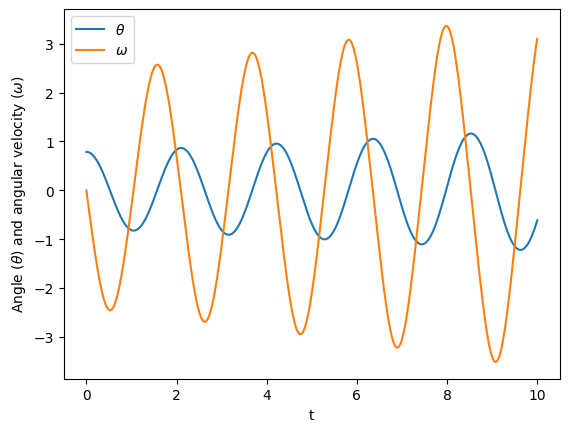

In [8]:
problem = Pendulum(L=1)
solver = ForwardEuler(problem)
solver.set_initial_condition([np.pi / 4, 0])
T = 10
N = 1000
t, u = solver.solve(t_span=(0, T), N=N)
plt.plot(t, u[:, 0], label=r'$\theta$')
plt.plot(t, u[:, 1], label=r'$\omega$')
plt.xlabel('t')
plt.ylabel(r'Angle ($\theta$) and angular velocity ($\omega$)')
plt.legend()